# 5 · The Mechanics of the Spectrum

**Observational record associated with the book**  
*Discovering Chaos in Prime Numbers — Computational Investigations through the Euler Mirror*   
© Alvaro Costa, 2025

This notebook is part of a **canonical sequence of computational records**.  
It does **not** introduce new hypotheses, conjectures, or interpretative models.

Its sole purpose is to **record** the behaviour of arithmetic structures under an explicit,  
deterministic, and reproducible observational regime.

The complete conceptual discussion is presented in the book.  
This notebook documents **only** the corresponding experiment.

**Licence:** Creative Commons BY–NC–ND 4.0  
Reading, execution, and citation are permitted.  
Modification, adapted redistribution, or independent commercial use are **not** permitted.


---

## 1. Operational recap

In the previous chapters, the arithmetic signal

$$
\Delta_\pi(x) = \pi(x) - 2\,\pi(\lfloor x/2 \rfloor)
$$

was defined, and the operator $M$ was constructed from $\Delta_\pi(x)$ together with the rescaling $\ln(x)$.

In this notebook, we work in a finite and fully controlled regime, fixing $N = 32$ and the discrete domain $x \in \{1,2,\dots,32\}$.

The objective is to carry out explicitly:

- the preparation of the data $\Delta_\pi(x)$ and $\ln(x)$;
- the construction of the matrix $M \in \mathbb{R}^{32 \times 32}$;
- the computation of the spectrum of $M$ (eigenvalues and eigenvectors).

No statistics are computed at this stage. No hypotheses are formulated.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We reuse the functions defined in previous chapters
def primes_up_to(n: int) -> np.ndarray:
    if n < 2:
        return np.array([], dtype=int)
    sieve = np.ones(n + 1, dtype=bool)
    sieve[:2] = False
    for i in range(2, int(np.sqrt(n)) + 1):
        if sieve[i]:
            sieve[i * i : n + 1 : i] = False
    return np.flatnonzero(sieve)

# Parameter of our toy universe
N = 32
all_primes = primes_up_to(N)
x_range = np.arange(1, N + 1)

# --- Vectorised computation block ---
pi_cumulative = np.zeros(N + 1, dtype=int)
pi_cumulative[all_primes] = 1
pi_cumulative = np.cumsum(pi_cumulative)

pi_x_vals = pi_cumulative[x_range]
pi_x_div_2_vals = pi_cumulative[x_range // 2]
delta_pi_vals = pi_x_vals - 2 * pi_x_div_2_vals
# -----------------------------------

# Creation of a didactic DataFrame
df_32 = pd.DataFrame({
    'x': x_range,
    'π(x)': pi_x_vals,
    'Δπ(x)': delta_pi_vals,
    'ln(x)': np.log(x_range)
})

print("Data table for the toy universe N = 32:")
display(df_32.T)  # Transposed for better on-screen readability


Data table for the toy universe N = 32:


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
x,1.0,2.000000,3.000000,4.000000,5.000000,6.000000,7.00000,8.000000,9.000000,10.000000,...,23.000000,24.000000,25.000000,26.000000,27.000000,28.000000,29.000000,30.000000,31.000000,32.000000
π(x),0.0,1.000000,2.000000,2.000000,3.000000,3.000000,4.00000,4.000000,4.000000,4.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000,11.000000,11.000000
Δπ(x),0.0,1.000000,2.000000,0.000000,1.000000,-1.000000,0.00000,0.000000,0.000000,-2.000000,...,-1.000000,-1.000000,-1.000000,-3.000000,-3.000000,-3.000000,-2.000000,-2.000000,-1.000000,-1.000000
ln(x),0.0,0.693147,1.098612,1.386294,1.609438,1.791759,1.94591,2.079442,2.197225,2.302585,...,3.135494,3.178054,3.218876,3.258097,3.295837,3.332205,3.367296,3.401197,3.433987,3.465736


---

## 2. Explicit construction of the operator $M$ $(32 \times 32)$

With the input data prepared, we apply directly the definition of the operator $M$, as introduced in the previous chapter:

$$
M_{i,j}
=
\cos\bigl(\Delta_\pi(x_i)\,\ln(x_j)\bigr)
+
\cos\bigl(\Delta_\pi(x_j)\,\ln(x_i)\bigr).
$$

The code below extracts the vectors $\Delta_\pi(x)$ and $\ln(x)$ from the table and constructs the real and symmetric matrix $M \in \mathbb{R}^{32 \times 32}$.

The heatmap allows the internal organisation of the operator in this finite regime to be visualised.


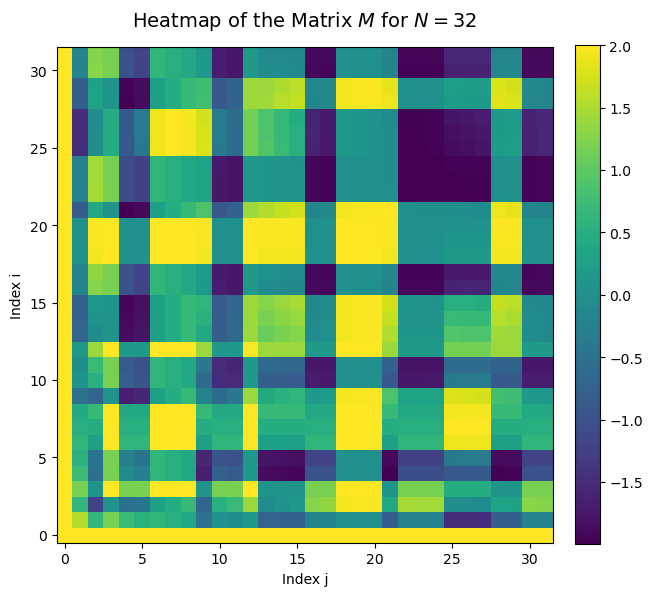

In [2]:
# Extract vectors from the table
delta_pi_vec = df_32['Δπ(x)'].to_numpy()
log_x_vec = df_32['ln(x)'].to_numpy()

# Efficient construction of the matrix M
C = np.cos(np.outer(delta_pi_vec, log_x_vec))
M_32 = C + C.T

# Visualisation of the matrix M
plt.style.use('default')
fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(M_32, cmap='viridis', origin='lower')
ax.set_title(r"Heatmap of the Matrix $M$ for $N=32$", fontsize=14, pad=15)
ax.set_xlabel("Index j")
ax.set_ylabel("Index i")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.show()


In [3]:
# Computation of eigenvalues and eigenvectors
lam, v = np.linalg.eigh(M_32)

print(f"The 32x32 matrix M has {len(lam)} real eigenvalues (energy levels):")
# Print the eigenvalues rounded for clarity
print(np.round(lam, 2))


The 32x32 matrix M has 32 real eigenvalues (energy levels):
[-25.6   -9.51  -5.57  -0.    -0.    -0.    -0.    -0.    -0.    -0.
  -0.    -0.    -0.    -0.    -0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     1.67   5.51
  11.97  26.49]


---

## 3. What are eigenvectors?

Let $M$ be a real and symmetric matrix.

A real number $\lambda$ is called an eigenvalue of $M$ if there exists a non-zero vector $v$ such that

$$
M v = \lambda v.
$$

The corresponding vector $v$ is called an eigenvector.

In the context of this notebook, each eigenvector corresponds to a spectral direction associated with the operator $M$, that is, a direction in the vector space that remains invariant under the action of $M$, up to a scalar factor.

Each eigenvector has $N$ components, indexed by the discrete values of $x$.


Each of the 32 eigenvalues has a corresponding eigenvector with N=32 components.
Shape of the eigenvector matrix 'v': (32, 32) (each column is an eigenvector)


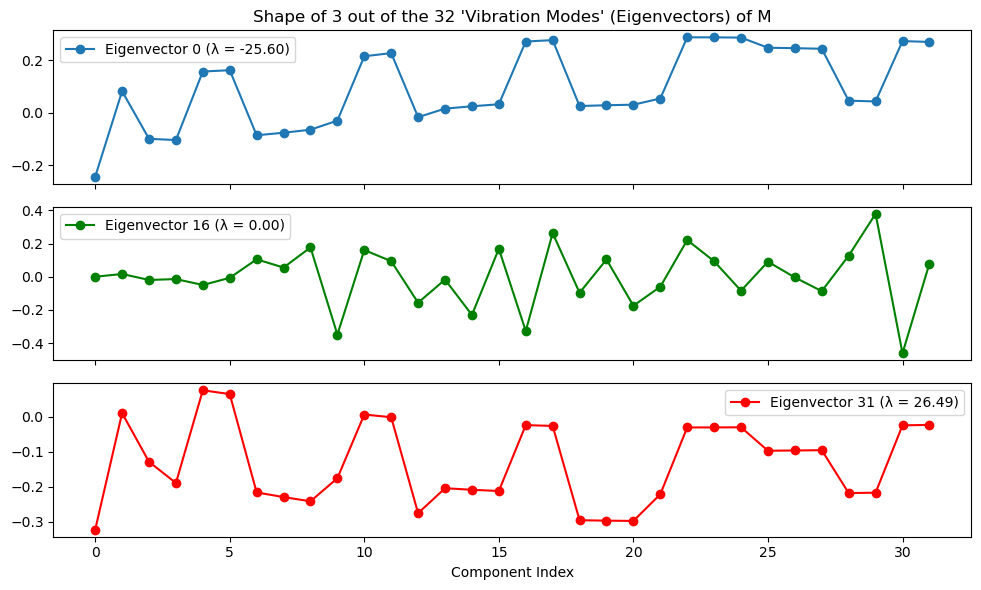

In [4]:
print(f"Each of the 32 eigenvalues has a corresponding eigenvector with N=32 components.")
print(f"Shape of the eigenvector matrix 'v': {v.shape} (each column is an eigenvector)")

# Visualising the shape of 3 out of the 32 vibration modes
fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

# Eigenvector associated with the smallest eigenvalue (ground state)
axes[0].plot(v[:, 0], 'o-', label=f"Eigenvector 0 (λ = {lam[0]:.2f})")
axes[0].set_title("Shape of 3 out of the 32 'Vibration Modes' (Eigenvectors) of M")
axes[0].legend()

# Eigenvector from the middle of the spectrum
mid_idx = N // 2
axes[1].plot(v[:, mid_idx], 'o-', label=f"Eigenvector {mid_idx} (λ = {lam[mid_idx]:.2f})", color='green')
axes[1].legend()

# Eigenvector associated with the largest eigenvalue (most excited state)
axes[2].plot(v[:, -1], 'o-', label=f"Eigenvector {N-1} (λ = {lam[-1]:.2f})", color='red')
axes[2].set_xlabel("Component Index")
axes[2].legend()

plt.tight_layout()
plt.show()


---

## 4. Preparation of the observation regime

Up to this point, the operator $M$ has been constructed and analysed in a finite regime, with $N = 32$.

In this context, it has been possible to:

- formally define eigenvalues and eigenvectors;
- explicitly compute the spectrum of the operator;
- ascertain that the spectral decomposition is well defined in this finite regime.

This regime is not intended to reveal statistical regularities. It serves only to fix definitions and to validate the procedure.

The question guiding the subsequent chapters is the following:

**how does the spectrum of the operator $M$ behave when the domain is expanded and when the initial scale $X_0$ is shifted along the number line?**

As observed previously, the signal $\Delta_\pi(x)$ exhibits distinct behaviours at different scales. In the following chapters, the tools introduced here will be applied systematically to measure how the spectrum of $M$ responds to these variations.

No hypotheses will be assumed. Any regularities, if present, will be observed.
